<a href="https://colab.research.google.com/github/nmobas/DS-Projects/blob/main/CreditCardFraud_rwdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print(len(df[df['Class'] == 0 ])/len(df) * 100)
print(len(df[df['Class'] == 1 ])/len(df) * 100)

99.82725143693798
0.1727485630620034


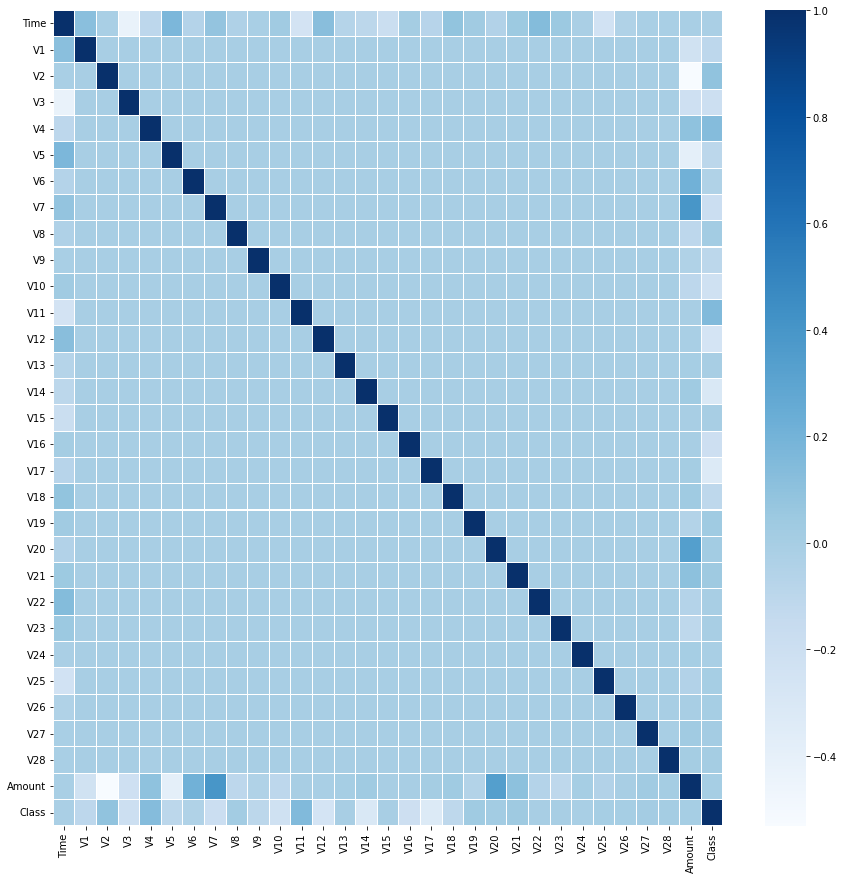

In [ ]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

In [ ]:
X = df.drop(['Time'], axis =1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


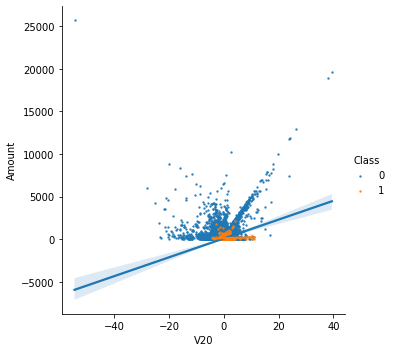

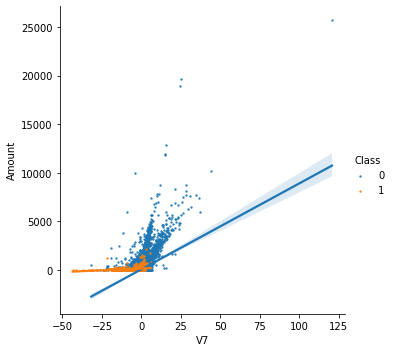

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

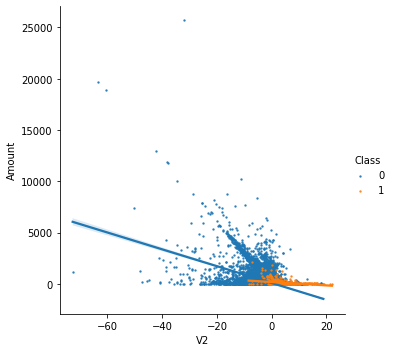

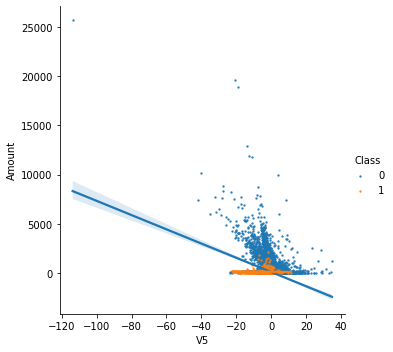

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

In [ ]:
Y = X['Class']
X = X.drop(['Class'], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state = 10)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4, n_jobs = 4,random_state= 20)

xgb.fit(x_train, y_train)

XGBClassifier(max_depth=4, n_jobs=4, random_state=20)

In [ ]:
from sklearn.metrics import average_precision_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_curve
from xgboost import plot_importance, to_graphviz
from sklearn.preprocessing import StandardScaler


y_pred = xgb.predict(x_test)
y_prob = xgb.predict_proba(x_test)



def perf_report(y_test,y_pred, y_prob):
  print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
  print('F1 - score :',(f1_score(y_test,y_pred)))
  print('Confusion_matrix : ')
  print(confusion_matrix(y_test,y_pred))
  print("accuracy_score")
  print(accuracy_score(y_test,y_pred))
  print("classification_report")
  print(classification_report(y_test,y_pred))


perf_report(y_test, y_pred, y_prob)


AUPRC : 0.8385963211542883
F1 - score : 0.8618784530386742
Confusion_matrix : 
[[56859     5]
 [   20    78]]
accuracy_score
0.9995611109160493
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9922081364200154


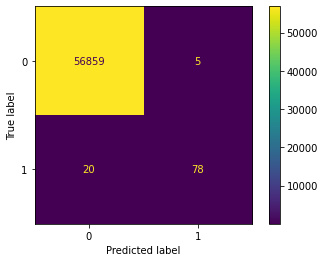

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

def confMatrix_auc(y_test, y_pred, y_prob):
  auc = roc_auc_score(y_test, y_prob[:,1])
  print(auc)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=xgb.classes_)
  disp.plot()
  plt.show()



confMatrix_auc(y_test, y_pred , y_prob)

#auc = roc_auc_score(y_test, y_prob[:, 1])
#print(auc)
#disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=xgb.classes_)
#disp.plot()
#plt.show()

In [ ]:
preds = X.columns.values
preds

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

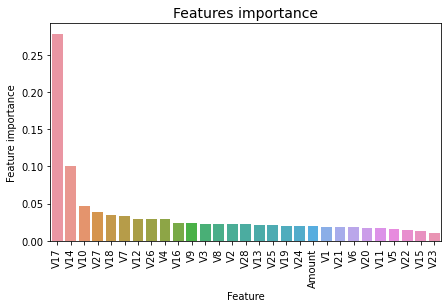

In [ ]:
tmp = pd.DataFrame({'Feature': preds, 'Feature importance': xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [ ]:
from sklearn.utils import class_weight

classw = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y =y_train)
classw

array([  0.50086612, 289.14340102])

In [ ]:
xgb2 = XGBClassifier(max_depths = 4, class_weight =classw, n_jobs = 4, random_state = 10 )
xgb2.fit(x_train, y_train)

XGBClassifier(class_weight=array([  0.50086612, 289.14340102]), max_depths=4,
              n_jobs=4, random_state=10)

In [ ]:
yxgb2 = xgb2.predict(x_test)
ypxgb2 = xgb2.predict_proba(x_test)
perf_report(y_test,yxgb2, ypxgb2)


AUPRC : 0.8342198870229242
F1 - score : 0.8681318681318683
Confusion_matrix : 
[[56859     5]
 [   19    79]]
accuracy_score
0.9995786664794073
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9921608521011106


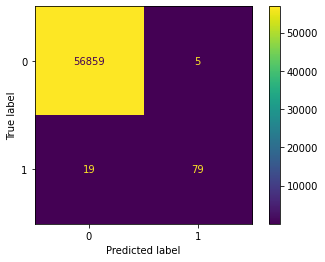

In [ ]:
confMatrix_auc(y_test,yxgb2, ypxgb2)

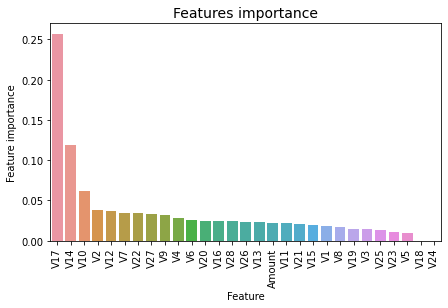

In [ ]:
tmp = pd.DataFrame({'Feature': preds, 'Feature importance': xgb2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
pip install imbalanced-ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 39.3 MB/s 
     |████████████████████████████████| 11.2 MB 64.0 MB/s 
     |████████████████████████████████| 965 kB 56.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from imbalanced_ensemble.ensemble import  SelfPacedEnsembleClassifier


xgb3 =  SelfPacedEnsembleClassifier(base_estimator = XGBClassifier() ,random_state = 10)
xgb3.fit(x_train, y_train)
yxgb3 = xgb3.predict(x_test)
ypxgb3 = xgb3.predict_proba(x_test)

In [ ]:
perf_report(y_test, yxgb3, ypxgb3)

AUPRC : 0.8483831567773685
F1 - score : 0.8602150537634408
Confusion_matrix : 
[[56856     8]
 [   18    80]]
accuracy_score
0.9995435553526912
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9932838322442089


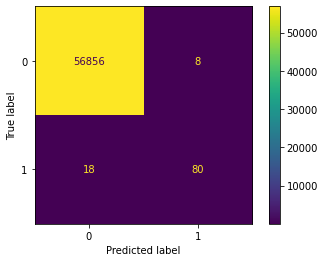

In [ ]:
confMatrix_auc(y_test,yxgb3, ypxgb3 )



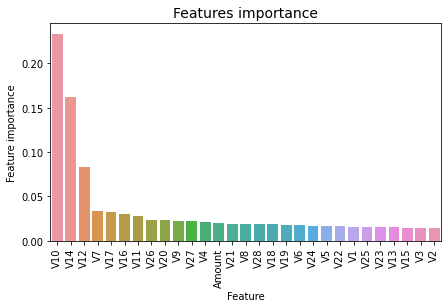

In [ ]:
tmp = pd.DataFrame({'Feature': preds, 'Feature importance': xgb3.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
clf1 = RandomForestClassifier(max_depth = 4, random_state =10)
clf1.fit(x_train, y_train)
ypred1 = clf1.predict(x_test)
yprob1 = clf1.predict_proba(x_test)

In [ ]:
perf_report(y_test, ypred1, yprob1)

AUPRC : 0.769581102253805
F1 - score : 0.7630057803468209
Confusion_matrix : 
[[56855     9]
 [   32    66]]
accuracy_score
0.9992802219023208
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.67      0.76        98

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



0.9590081741756915


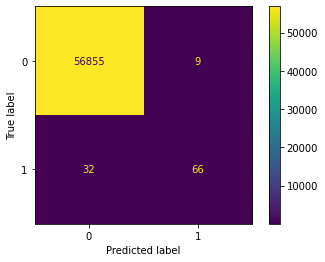

In [ ]:
confMatrix_auc(y_test, ypred1, yprob1)


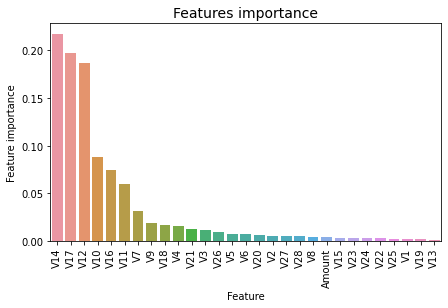

In [ ]:
tmp = pd.DataFrame({'Feature': preds, 'Feature importance': clf1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
clf2 = RandomForestClassifier(max_depth = 4,class_weight= {0: 0.5, 1: 289.14} ,random_state =10)
clf2.fit(x_train, y_train)
ypred2 = clf2.predict(x_test)
yprob2 = clf2.predict_proba(x_test)

AUPRC : 0.6895809962627095
F1 - score : 0.4486486486486486
Confusion_matrix : 
[[56675   189]
 [   15    83]]
accuracy_score
0.9964186650749622
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.85      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.92      0.72     56962
weighted avg       1.00      1.00      1.00     56962

0.9867485471960309


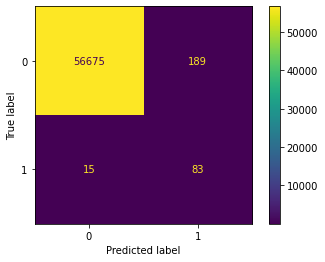

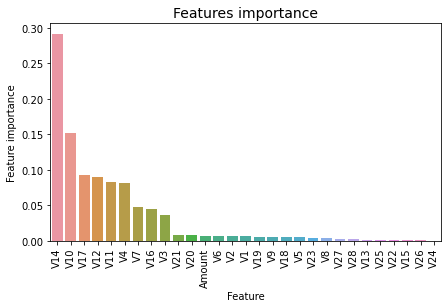

In [ ]:
perf_report(y_test, ypred2, yprob2)
confMatrix_auc(y_test, ypred2, yprob2)


tmp = pd.DataFrame({'Feature': preds, 'Feature importance': clf2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [ ]:
clf3 =  SelfPacedEnsembleClassifier(base_estimator = RandomForestClassifier(max_depth=4)  ,random_state = 10)
clf3.fit(x_train, y_train)
ypred3 = clf3.predict(x_test)
yprob3 = clf3.predict_proba(x_test)

AUPRC : 0.8244326751503079
F1 - score : 0.8210526315789473
Confusion_matrix : 
[[56850    14]
 [   20    78]]
accuracy_score
0.999403110845827
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.80      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

0.9880796860105888


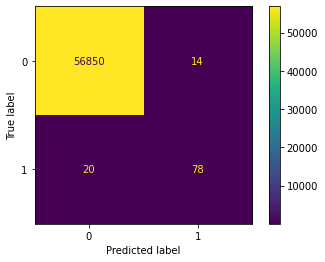

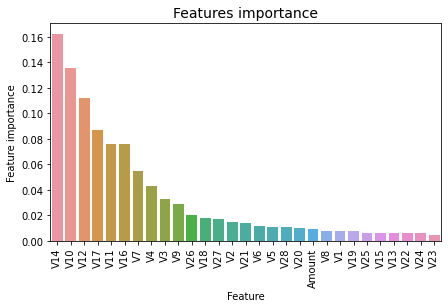

In [ ]:
perf_report(y_test, ypred3, yprob3)
confMatrix_auc(y_test, ypred3, yprob3)

tmp = pd.DataFrame({'Feature': preds, 'Feature importance': clf3.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

**Classic Classifiers**

AUPRC : 0.7199747113290019
F1 - score : 0.7251461988304094
Confusion_matrix : 
[[56853    11]
 [   36    62]]
accuracy_score
0.9991748885221726
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

0.9370314635420854


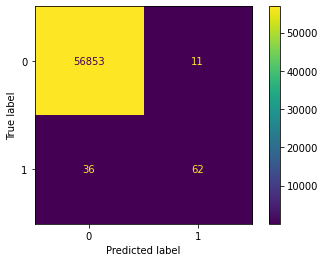

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


m1 = LogisticRegression()
m1.fit(x_train, y_train)
ylr1 = m1.predict(x_test)
yplr1 = m1.predict_proba(x_test)



perf_report(y_test, ylr1, yplr1)
confMatrix_auc(y_test, ylr1, yplr1)


AUPRC : 0.7209439615101452
F1 - score : 0.839779005524862
Confusion_matrix : 
[[56857     7]
 [   22    76]]
accuracy_score
0.9994908886626171
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

0.8977821590791635


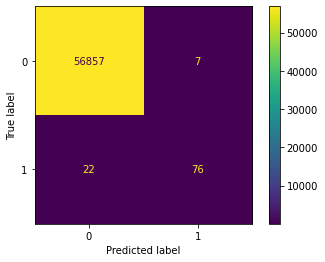

In [ ]:
m2 = DecisionTreeClassifier(max_depth= 5, random_state=10)

m2.fit(x_train, y_train)
y2pred = m2.predict(x_test)
y2prob= m2.predict_proba(x_test)

perf_report(y_test, y2pred, y2prob)
confMatrix_auc(y_test, y2pred, y2prob)


In [ ]:
m3 =  SelfPacedEnsembleClassifier(random_state = 10)
m3.fit(x_train, y_train)
ym3 = m3.predict(x_test)
ypm3 = m3.predict_proba(x_test)

AUPRC : 0.8316331612042933
F1 - score : 0.7534883720930232
Confusion_matrix : 
[[56828    36]
 [   17    81]]
accuracy_score
0.9990695551420246
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.83      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962

0.985188613289998


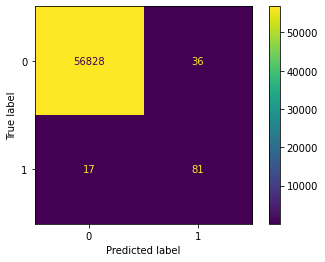

In [ ]:
perf_report(y_test, ym3, ypm3 )
confMatrix_auc(y_test, ym3, ypm3 )

In [ ]:
from imbalanced_ensemble.ensemble import SMOTEBoostClassifier

clf4 =  SMOTEBoostClassifier(random_state = 10)
clf4.fit(x_train, y_train)
ypred4 = clf4.predict(x_test)
yprob4 = clf4.predict_proba(x_test)

AUPRC : 0.777888290417214
F1 - score : 0.1501706484641638
Confusion_matrix : 
[[55878   986]
 [   10    88]]
accuracy_score
0.9825146588954039
classification_report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.90      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

0.9839383154077612


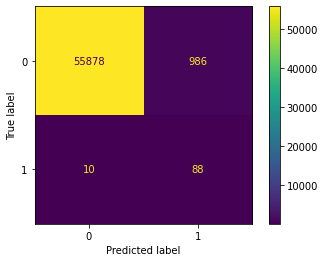

In [ ]:
perf_report(y_test,ypred4,yprob4  )
confMatrix_auc(y_test, ypred4, yprob4  )


AUPRC : 0.0017204452090867595
F1 - score : 0.0
Confusion_matrix : 
[[56725   139]
 [   98     0]]
accuracy_score
0.9958393314841473
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

0.49860192740574


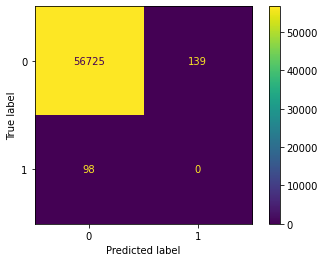

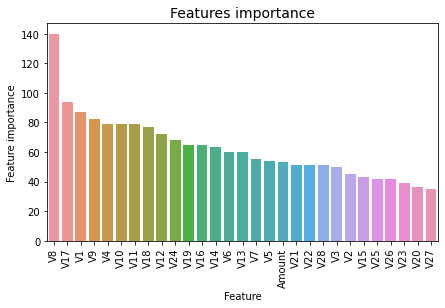

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_curve, ConfusionMatrixDisplay



lgbm1 = LGBMClassifier(random_state = 10)


lgbm1.fit(x_train, y_train)
yl1 = lgbm1.predict(x_test)
ypl1= lgbm1.predict_proba(x_test)


perf_report(y_test,yl1,ypl1 )
confMatrix_auc(y_test, yl1, ypl1  )

tmp = pd.DataFrame({'Feature': preds, 'Feature importance': lgbm1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

AUPRC : 0.75935330413652
F1 - score : 0.344689378757515
Confusion_matrix : 
[[56549   315]
 [   12    86]]
accuracy_score
0.9942593307819247
classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.88      0.34        98

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962

0.9911566659584486


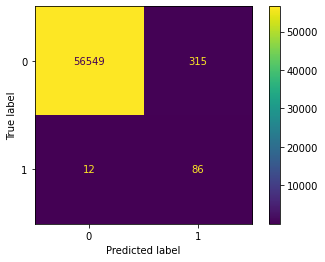

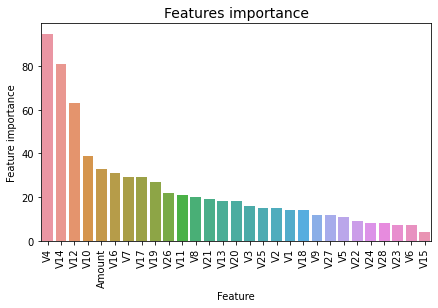

In [ ]:
lgbm2 = LGBMClassifier(class_weight= {0: 0.5, 1: 289.14}, max_depth = 3  ,random_state = 10)


lgbm2.fit(x_train, y_train)
yl2 = lgbm2.predict(x_test)
ypl2= lgbm2.predict_proba(x_test)

perf_report(y_test,yl2,ypl2 )
confMatrix_auc(y_test, yl2, ypl2  )


tmp = pd.DataFrame({'Feature': preds, 'Feature importance': lgbm2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 


AUPRC : 0.8542208360486179
F1 - score : 0.8602150537634408
Confusion_matrix : 
[[56856     8]
 [   18    80]]
accuracy_score
0.9995435553526912
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

0.9929387554121255


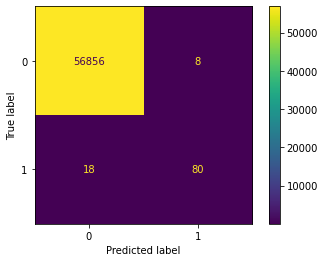

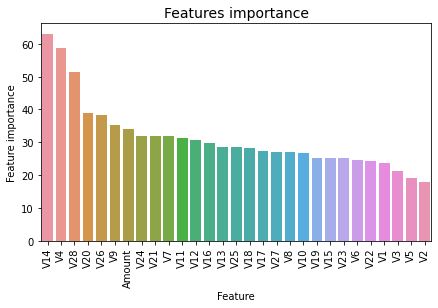

In [ ]:
from imbalanced_ensemble.ensemble import  SelfPacedEnsembleClassifier

lgbm3 =  SelfPacedEnsembleClassifier(base_estimator =  LGBMClassifier(max_depth=4)  ,random_state = 10)
lgbm3.fit(x_train, y_train)
yl3 = lgbm3.predict(x_test)
ypl3 = lgbm3.predict_proba(x_test)


perf_report(y_test,yl3,ypl3 )
confMatrix_auc(y_test, yl3, ypl3  )


tmp = pd.DataFrame({'Feature': preds, 'Feature importance': lgbm3.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
import random
import os

SEED = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True


if torch.cuda.is_available():
    DEVICE = "cuda" 
else:
    DEVICE = "cpu"
print("Selected device is",DEVICE)

seed_everything(SEED)


class FraudDatasetUnsupervised(torch.utils.data.Dataset):
    
    def __init__(self, x,output=True):
        'Initialization'
        self.x = x
        self.output = output

    def __len__(self):
        'Returns the total number of samples'
        return len(self.x)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample index
        item = self.x[index].to(DEVICE)
        if self.output:
            return item, item
        else:
            return item

Selected device is cpu


In [ ]:
xtrain = torch.FloatTensor(x_train.values)
xtest = torch.FloatTensor(x_test.values)
ytrain = torch.FloatTensor(y_train.values)
ytest = torch.FloatTensor(y_test.values)


training_set = FraudDatasetUnsupervised(xtrain)
valid_set = FraudDatasetUnsupervised(xtest)


train_loader_params = {'batch_size': 64, 'shuffle': True, 'num_workers': 0}
valid_loader_params = {'batch_size': 64,'num_workers': 0}

training_generator = torch.utils.data.DataLoader(training_set, **train_loader_params)
valid_generator = torch.utils.data.DataLoader(valid_set, **valid_loader_params)
    

In [ ]:
class SimpleAutoencoder(torch.nn.Module):
    
        def __init__(self, input_size, intermediate_size, code_size):
            super(SimpleAutoencoder, self).__init__()
            # parameters
            self.input_size = input_size
            self.intermediate_size = intermediate_size           
            self.code_size  = code_size
            
            self.relu = torch.nn.ReLU()   
            
            #encoder
            self.fc1 = torch.nn.Linear(self.input_size, self.intermediate_size)
            self.fc2 = torch.nn.Linear(self.intermediate_size, self.code_size)
            
            #decoder 
            self.fc3 = torch.nn.Linear(self.code_size, self.intermediate_size)            
            self.fc4 = torch.nn.Linear(self.intermediate_size, self.input_size)
            
            
        def forward(self, x):
            
            hidden = self.fc1(x)
            hidden = self.relu(hidden)
            
            code = self.fc2(hidden)
            code = self.relu(code)
 
            hidden = self.fc3(code)
            hidden = self.relu(hidden)
            
            output = self.fc4(hidden)
            #linear activation in final layer)            
            
            return output

In [ ]:
def per_sample_mse(model, generator):
    
    model.eval()
    criterion = torch.nn.MSELoss(reduction="none")
    batch_losses = []
    
    for x_batch, y_batch in generator:
        # Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_batch)
        loss_app = list(torch.mean(loss,axis=1).detach().cpu().numpy())
        batch_losses.extend(loss_app)
    
    return batch_losses

In [ ]:
def training_loop(model,training_generator,valid_generator,optimizer,criterion,max_epochs=100,apply_early_stopping=True,patience=2,verbose=False):
    #Setting the model in training mode
    model.train()

    if apply_early_stopping:
        early_stopping = EarlyStopping(verbose=verbose,patience=patience)
    
    all_train_losses = []
    all_valid_losses = []
    
    #Training loop
    start_time=time.time()
    for epoch in range(max_epochs):
        model.train()
        train_loss=[]
        for x_batch, y_batch in training_generator:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()   
            train_loss.append(loss.item())
        
        #showing last training loss after each epoch
        all_train_losses.append(np.mean(train_loss))
        if verbose:
            print('')
            print('Epoch {}: train loss: {}'.format(epoch, np.mean(train_loss)))
        #evaluating the model on the test set after each epoch    
        valid_loss = evaluate_model(model,valid_generator,criterion)
        all_valid_losses.append(valid_loss)
        if verbose:
            print('valid loss: {}'.format(valid_loss))
        if apply_early_stopping:
            if not early_stopping.continue_training(valid_loss):
                if verbose:
                    print("Early stopping")
                break
        
    training_execution_time=time.time()-start_time
    return model,training_execution_time,all_train_losses,all_valid_losses

In [ ]:
class EarlyStopping:
    
    def __init__(self, patience=4, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = np.Inf
    
    def continue_training(self,current_score):
        if self.best_score > current_score:
            self.best_score = current_score
            self.counter = 0
            if self.verbose:
                print("New best score:", current_score)
        else:
            self.counter+=1
            if self.verbose:
                print(self.counter, " iterations since best score.")
                
        return self.counter <= self.patience   

In [ ]:
def evaluate_model(model,generator,criterion):
    model.eval()
    batch_losses = []
    for x_batch, y_batch in generator:
        # Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_batch)
        batch_losses.append(loss.item())
    mean_loss = np.mean(batch_losses)    
    return mean_loss

In [ ]:
autoencoder = SimpleAutoencoder(xtrain.shape[1], 100, 20).to(DEVICE)

criterion = torch.nn.MSELoss().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.0001)

losses = per_sample_mse(autoencoder, valid_generator)

In [ ]:
print(losses[0:5])
print(np.mean(losses))

[4.1574163, 1.4462777, 15.112072, 100.267715, 379.23706]
2407.8416


In [ ]:
import time

autoencoder,training_execution_time,train_losses,valid_losses = training_loop(autoencoder,
                                                                        training_generator,
                                                                        valid_generator,
                                                                        optimizer,
                                                                        criterion,
                                                                        max_epochs=80,
                                                                        verbose=True)


Epoch 0: train loss: 276.26598377274314
valid loss: 0.7251843467906669
New best score: 0.7251843467906669

Epoch 1: train loss: 0.7842853728036336
valid loss: 0.46497837555261307
New best score: 0.46497837555261307

Epoch 2: train loss: 0.5760429688206016
valid loss: 0.34640827975690563
New best score: 0.34640827975690563

Epoch 3: train loss: 0.4566778145841386
valid loss: 0.2992736846375813
New best score: 0.2992736846375813

Epoch 4: train loss: 0.44506278073342453
valid loss: 0.226973510450787
New best score: 0.226973510450787

Epoch 5: train loss: 0.3851405404501837
valid loss: 2.828889081708242
1  iterations since best score.

Epoch 6: train loss: 0.3319311902215728
valid loss: 0.17730321390627476
New best score: 0.17730321390627476

Epoch 7: train loss: 0.25686525725031195
valid loss: 0.14363976802957046
New best score: 0.14363976802957046

Epoch 8: train loss: 0.39262892196006705
valid loss: 0.6273129973414235
1  iterations since best score.

Epoch 9: train loss: 0.38065250453

In [ ]:
losses = per_sample_mse(autoencoder, valid_generator)
print(losses[0:5])
print(np.mean(losses))

[0.030081594, 0.03524507, 0.31567883, 0.032456324, 0.025155906]
0.14624971


In [ ]:
 from sklearn.metrics import roc_auc_score
 
 AUC_ROC = roc_auc_score(y_test, losses)

 print(AUC_ROC)

0.9120816728492185


In [ ]:
print(average_precision_score(y_test, losses))

0.03180386515313669
